# Flight Price Prediction

# Data Description

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

# Importing required Libariries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)

# Importing Dataset

In [5]:
df=pd.read_excel('C:\\Users\\Kiran kumar T\\Desktop\\Data_Train.xlsx')
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [6]:
ds=pd.read_excel('C:\\Users\\Kiran kumar T\\Desktop\\Test_set.xlsx')
ds.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [140]:
df.info() #check the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [141]:
ds.info() #check the information about test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [142]:
df.shape #check the data dimension

(10683, 11)

We have 10683 rows and 11 columns including the target column.

In [143]:
ds.shape #check the data dimension

(2671, 10)

We have 2671 rows and 10 columns excluding the target column.

In [144]:
df.columns    # checking the variables in column section.

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [145]:
df['Price'].value_counts() # checking the value counts of Target variable

10262    258
10844    212
7229     162
4804     160
4823     131
14714    109
3943     104
15129     93
3841      91
12898     86
3597      86
14781     84
9663      84
3873      80
12373     77
14151     74
8586      70
4174      69
5678      65
10368     63
6442      60
8016      60
3100      58
11087     57
14571     57
13014     57
13941     57
2754      56
4423      53
4544      51
14388     49
13377     49
4668      49
7832      47
3543      45
3419      43
8372      43
13067     42
13587     42
7480      41
7064      40
2227      40
13376     39
8040      39
9646      38
4049      38
6961      37
15554     36
13292     36
1965      36
16079     36
2017      35
4995      35
13817     35
4878      34
13029     33
5228      32
4148      32
14871     31
3383      31
12692     30
6093      30
4591      29
5403      29
4409      29
3625      29
4030      29
11467     29
5192      28
8452      28
6795      27
6144      27
8610      27
13727     26
7408      26
8529      26
9314      25

In [146]:
df['Airline'].value_counts()  # checking the value counts of Airlines.

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Graphical Representation

In [147]:
df['Price'].mean()  #Check the mean value for Flight Ticket Price

9087.064120565385

Text(0.5, 1.0, 'Flight Ticket Price Prediction')

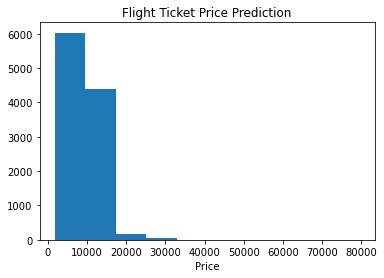

In [148]:
#Histogram plot for Price of the data.
plt.hist(df['Price'])
plt.xlabel('Price')
plt.title('Flight Ticket Price Prediction')

<AxesSubplot:title={'center':'Flight Ticket Price'}, xlabel='Price', ylabel='Density'>

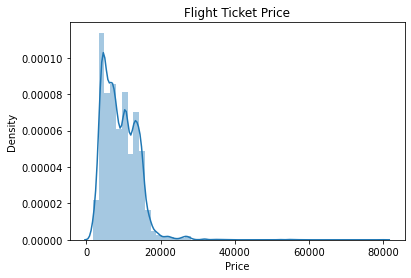

In [149]:
#Distplot for Next Tmin of data.
plt.title('Flight Ticket Price')
sns.distplot(df['Price'],kde=True)

The distplot clears that flight ticket price distribution of flight is lies between 10,000 to 20,000.

<AxesSubplot:title={'center':'Airline vs Price'}, xlabel='Airline', ylabel='Price'>

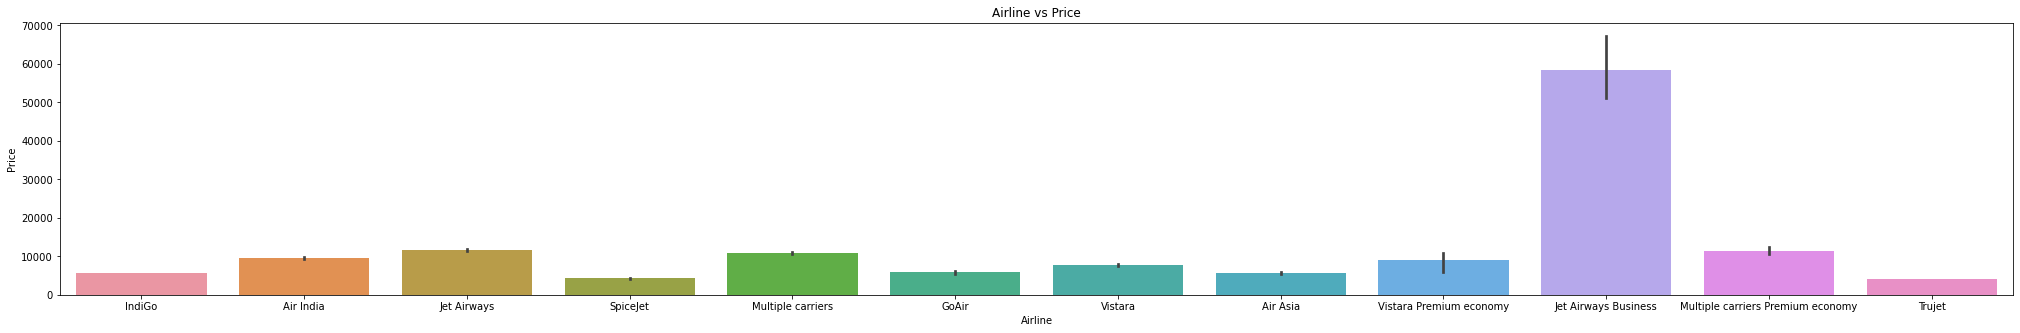

In [150]:
# Barplot Display distribution of data across all level of category
plt.figure(figsize=(35,5))
plt.title('Airline vs Price')
sns.barplot(x='Airline',y='Price',data=df)

Just by observing above graph, the Jet Airways Business Airlines price is high when compared to other premium airlines.

<AxesSubplot:title={'center':'Counts of Airlines'}, xlabel='Airline', ylabel='count'>

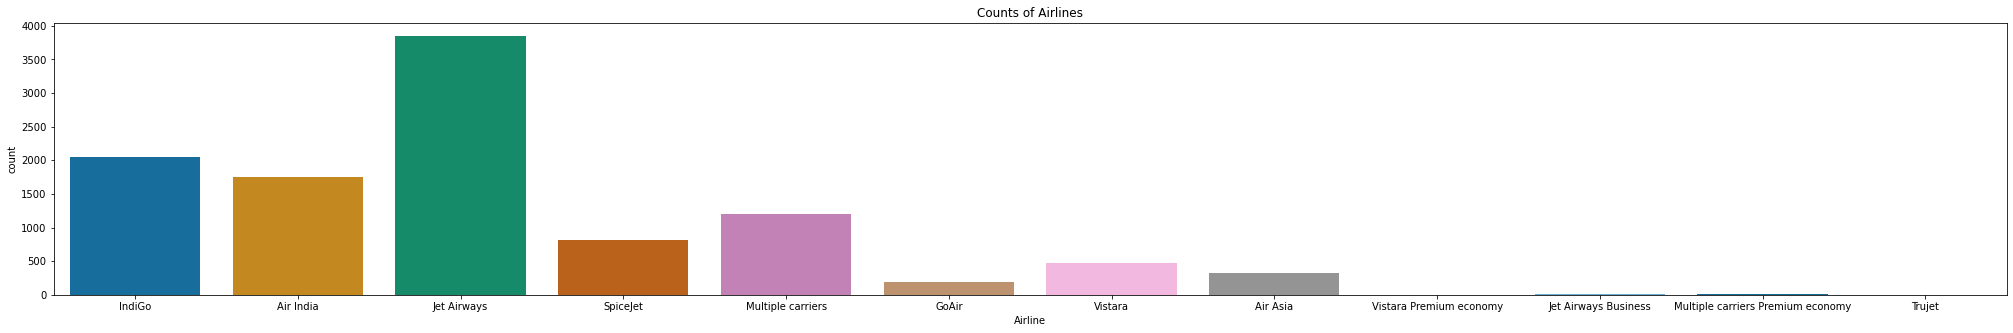

In [151]:
# Countplot Display distribution of data across all level of category
plt.subplots(figsize=(35,5))
plt.title('Counts of Airlines')
sns.countplot(x='Airline',data=df,palette='colorblind')

The Jet Airways has more number flights but Vistara Premium economy,Jet Airways Business & Turget have almost less flights.

In [152]:
# Scatterplot for Price vs Duration for data.
plt.figure(figsize = (10, 10))
plt.title('Price VS Duration')
plt.scatter(df['Duration'],df['Price'])
plt.xlabel('Duration')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

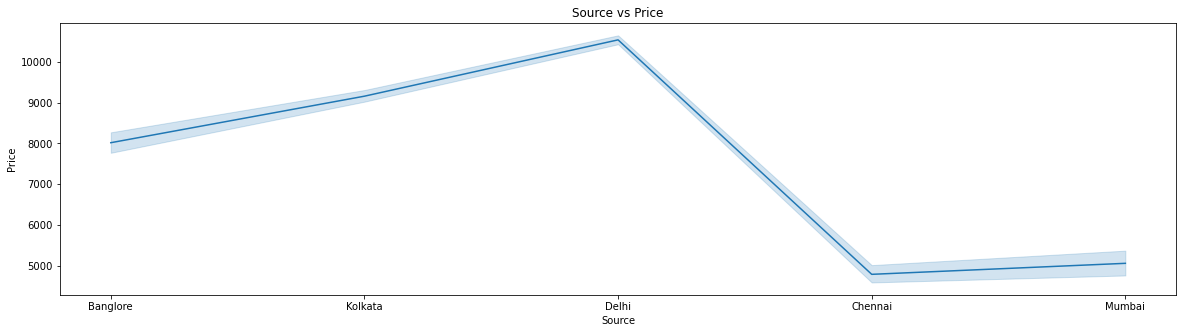

In [153]:
# Lineplot for Source vs Price for data.
plt.figure(figsize=(20,5))
plt.title('Source vs Price')
sns.lineplot(x='Source',y='Price',data=df)
plt.show()

The Delhi Source has high price range & low at Chennai source.

Text(0, 0.5, 'Price')

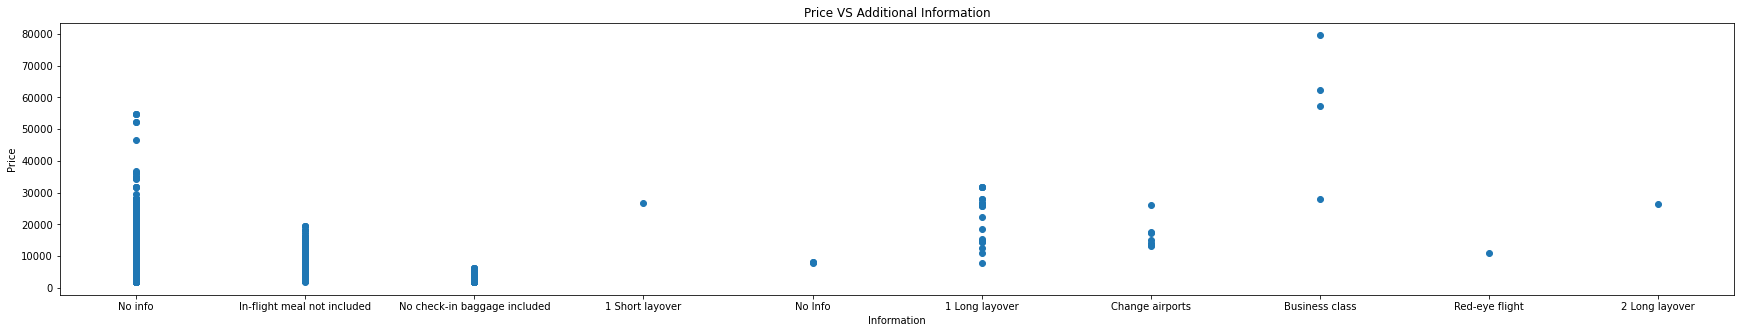

In [154]:
# Scatterplot for Price vs Additional_Info for data.
plt.figure(figsize=(30,5))
plt.title('Price VS Additional Information')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xlabel('Information')
plt.ylabel('Price')

From above scatter plot is it clear the price is high for Bussiness class.

<AxesSubplot:title={'center':'Flight Ticket Price'}, xlabel='Price'>

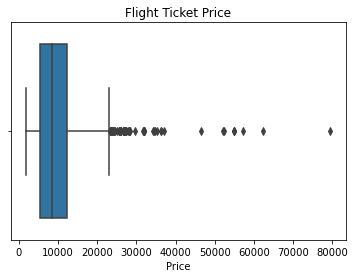

In [155]:
# Boxplot for Price for particular data.
plt.title('Flight Ticket Price')
sns.boxplot(df['Price'])

As we can see that there are some points which are seeems like outliers but we cannot remove them because these can be flight ticket price also.

Graphical Representation Conclusion

The columns that are going to be drop are Date of journey,Route, Departure Time, Arrival Time,Duration.They are strings,cannot be categorized and don't contribute much to the outcome.

# Preprocessing

In [156]:
df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'], axis = 1, inplace = True)

In [157]:
df.describe() #statistics summary for numerical columns

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

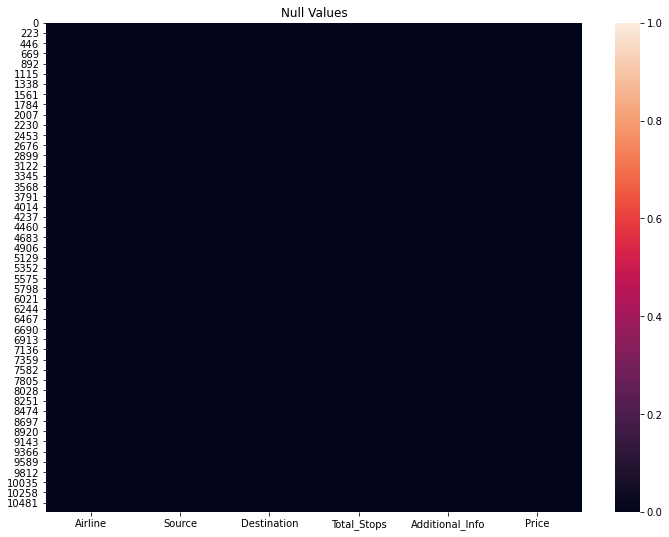

In [158]:
# Heatmap for Null value for data.
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [159]:
#Checking the null values in dataset
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [160]:
#filling the missing values for categorical terms by mode
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [161]:
#Filled the null values in dataset
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Converting all Object attributes into Numerical attributes by using LabelEncoder

In [162]:
df.head()   # informtion about top of the data.

Airline    Source Destination Total_Stops Additional_Info  Price
0       IndiGo  Banglore   New Delhi    non-stop         No info   3897
1    Air India   Kolkata    Banglore     2 stops         No info   7662
2  Jet Airways     Delhi      Cochin     2 stops         No info  13882
3       IndiGo   Kolkata    Banglore      1 stop         No info   6218
4       IndiGo  Banglore   New Delhi      1 stop         No info  13302

# Checking the unique data in columns section

In [163]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [164]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [165]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [166]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [167]:
df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [168]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [169]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [170]:
df.head()    # informtion about top of the data after label encoder.

Airline  Source  Destination  Total_Stops  Additional_Info  Price
0        3       0            5            4                8   3897
1        1       3            0            1                8   7662
2        4       2            1            1                8  13882
3        3       3            0            0                8   6218
4        3       0            5            0                8  13302

In [171]:
df.describe()

Airline        Source   Destination   Total_Stops  \
count  10683.000000  10683.000000  10683.000000  10683.000000   
mean       3.965927      1.952261      1.436113      1.458111   
std        2.352155      1.177221      1.474782      1.806290   
min        0.000000      0.000000      0.000000      0.000000   
25%        3.000000      2.000000      0.000000      0.000000   
50%        4.000000      2.000000      1.000000      0.000000   
75%        4.000000      3.000000      2.000000      4.000000   
max       11.000000      4.000000      5.000000      4.000000   

       Additional_Info         Price  
count     10683.000000  10683.000000  
mean          7.393054   9087.064121  
std           1.214211   4611.359167  
min           0.000000   1759.000000  
25%           8.000000   5277.000000  
50%           8.000000   8372.000000  
75%           8.000000  12373.000000  
max           9.000000  79512.000000

<AxesSubplot:>

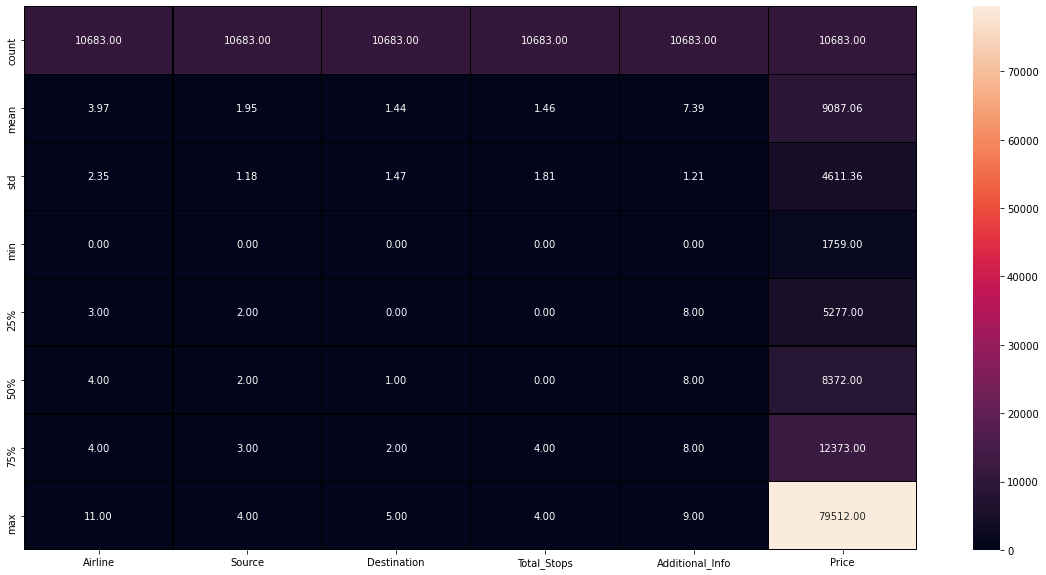

In [172]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [173]:
dfcor=df.corr()
dfcor

Airline    Source  Destination  Total_Stops  \
Airline          1.000000 -0.013401     0.018479     0.036064   
Source          -0.013401  1.000000    -0.592574    -0.225601   
Destination      0.018479 -0.592574     1.000000     0.337883   
Total_Stops      0.036064 -0.225601     0.337883     1.000000   
Additional_Info -0.060802 -0.022107     0.026806     0.164009   
Price           -0.039520  0.015998    -0.071112    -0.571174   

                 Additional_Info     Price  
Airline                -0.060802 -0.039520  
Source                 -0.022107  0.015998  
Destination             0.026806 -0.071112  
Total_Stops             0.164009 -0.571174  
Additional_Info         1.000000 -0.065478  
Price                  -0.065478  1.000000

<AxesSubplot:>

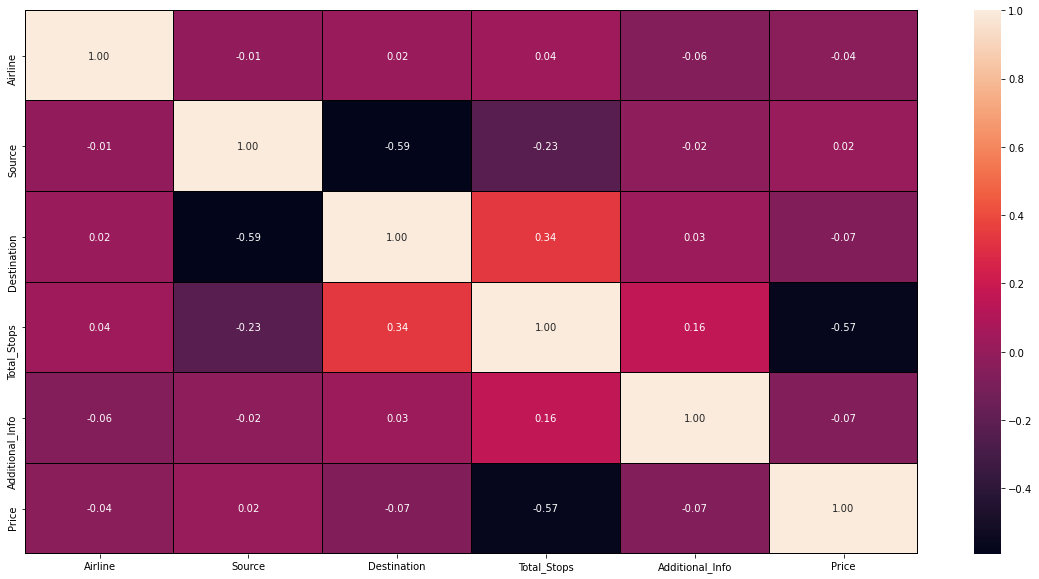

In [174]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

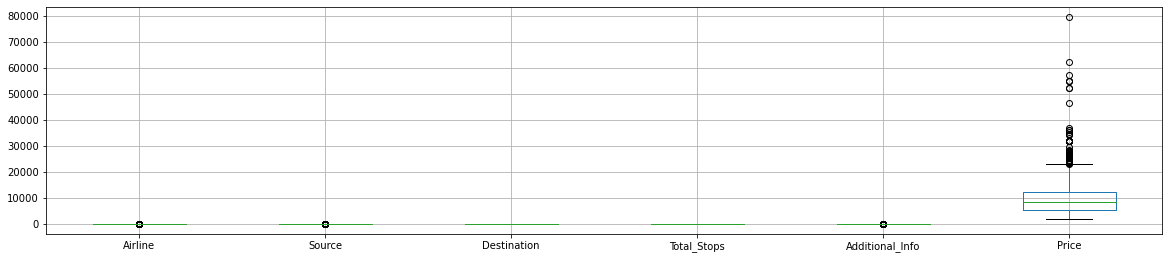

In [175]:
df.boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [176]:
from scipy.stats import zscore

In [177]:
z=np.abs(zscore(df))
z

array([[0.41067545, 1.65844074, 2.41666505, 1.4073085 , 0.49989167,
        1.12554821],
       [1.26099927, 0.89005213, 0.97382594, 0.25363166, 0.49989167,
        0.30904789],
       [0.01448647, 0.04055451, 0.29572775, 0.25363166, 0.49989167,
        1.03985835],
       ...,
       [0.01448647, 1.65844074, 0.38237045, 1.4073085 , 0.49989167,
        0.40295085],
       [2.56545795, 1.65844074, 2.41666505, 1.4073085 , 0.49989167,
        0.77224576],
       [1.26099927, 0.04055451, 0.29572775, 0.25363166, 0.49989167,
        0.57815073]])

In [178]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

Airline  Source  Destination  Total_Stops  Additional_Info  Price
0        3       0            5            4                8   3897
1        1       3            0            1                8   7662
2        4       2            1            1                8  13882
3        3       3            0            0                8   6218
4        3       0            5            0                8  13302

In [179]:
df.shape

(10683, 6)

In [180]:
df_new.shape

(10578, 6)

In [181]:
Data_loss=((10683-10578)/10683*100)
Data_loss

0.9828699803426004

# Checking Skewness of the dataset

In [182]:
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
dtype: float64

In [183]:
x= df.drop('Price',axis=1)
y= df['Price']

In [184]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [185]:
df_new.skew()

Airline           -0.015312
Source            -0.238259
Destination        0.041560
Total_Stops        0.325203
Additional_Info   -1.372067
dtype: float64

In [186]:
x=df_new
x.head()

Airline    Source  Destination  Total_Stops  Additional_Info
0 -0.295500 -1.599712     1.752703     1.293592         0.524703
1 -1.420300  0.902061    -1.370545     0.355606         0.524703
2  0.147745 -0.012108     0.005861     0.355606         0.524703
3 -0.295500  0.902061    -1.370545    -0.905745         0.524703
4 -0.295500 -1.599712     1.752703    -0.905745         0.524703

# Regression Method

# Linear Regression Model

In [187]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [188]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.2495166001592003
At random state 0,the testing accuracy is:0.2464603942350675


At random state 1,the training accuracy is:0.24275816255262828
At random state 1,the testing accuracy is:0.24863083481373627


At random state 2,the training accuracy is:0.2543552453451361
At random state 2,the testing accuracy is:0.2447466238797248


At random state 3,the training accuracy is:0.2541857325487319
At random state 3,the testing accuracy is:0.24389408431281756


At random state 4,the training accuracy is:0.23791098948339917
At random state 4,the testing accuracy is:0.2511790954379074


At random state 5,the training accuracy is:0.2398410690821262
At random state 5,the testing accuracy is:0.250548261073838


At random state 6,the training accuracy is:0.24799362357125043
At random state 6,the testing accuracy is:0.24724819412122423


At random state 7,the training accuracy is:0.2482866668155942
At random state 7,the testing accuracy is:0.24737449976022

In [189]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=6)
lr.fit(x_train,y_train)

LinearRegression()

In [190]:
print(lr.intercept_)

9162.220131450207


In [191]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff_df

Co-efficient
Airline            -90.180572
Source            -395.185184
Destination         15.095041
Total_Stops      -2392.623333
Additional_Info    261.936778

In [192]:
pred=lr.predict(x_test)

In [193]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual     Predicted
6753     4508   6029.789272
9141     4668   6655.991427
6400    10588   7787.552815
7276     8529  10423.446041
10536   11200  11389.932683
5235     4804   5854.058885
3464     7153  10737.106878
2330     4823   6874.083752
6274    10262  10805.488725
3864     6934   6337.536681
2590     3943   6874.083752
6474    17327   7854.277222
6926     7893  11217.678994
7248     5406  10805.488725
5265     4878   6655.991427
10415    4544   6181.285911
1792    14151  11076.271846
6871     4544   6181.285911
10066    9165  12152.052876
3888     4804   5854.058885
7612    10783   9235.552078
496     14714  11458.314530
9068     9653   8581.785768
981      5162  11291.974269
4756     3807   6029.789272
2973    16736  12112.080841
8470    27992  12112.080841
830      7268  10737.106878
2569     4804   5854.058885
398     10741   6991.302992
7337    11087  11459.255035
4031     7229   6834.111716
810     13848   7787.552815
3007    13817  12112.080841
7638     8266  11389.932683
9756    13250   9235.552078
4909    11005   5341.980227
190      8738  12152.052876
6256     4823   6874.083752
1156     4591   6874.083752
5505     5000   6236.101569
549     11096  11217.678994
482      6643  10949.631086
5620     8479  10949.631086
10048    2759   4815.795182
4921     4668   6655.991427
7768     4423   6874.083752
4329     7229   6181.285911
8907    14571  11076.271846
5481    14781  11076.271846
9162     3687   6373.652384
3813     7888  11389.932683
10671    3100   5610.028136
3764     3749   6874.083752
9741    12373  10805.488725
5507    12347  11458.314530
841     10262  10805.488725
2985    11701   8581.785768
2355    14237   8440.378620
7511    10407  11389.932683
1060    12373  10805.488725
4536     3841   5209.984148
3377     5380  11116.243882
2069    10844  10423.446041
6296     3384   6591.744709
3136     6582  11498.286566
1321    12865   8581.785768
7025     3850   6591.744709
3739     4878   6655.991427
3768     8040   5468.620987
10255    7229   6834.111716
9800     3873   5687.446089
3667    16352  11599.721679
696      6838  11389.932683
3780    13882   8440.378620
9581    16389   7787.552815
472      6316  11498.286566
1053     5054  11498.286566
10338   18191   8371.996773
3871     3919   6230.009015
1589    11789  11389.932683
3480     4804   5854.058885
124      3540   6591.744709
4736     7064  10423.446041
8540     4778   5854.058885
2018    10262  10805.488725
2325     5769   6181.285911
6066     9042  11389.932683
1862    10975   8581.785768
5673    14629  11359.797516
5267     4176  11116.243882
2392     6093  11498.286566
381     15129   8440.378620
2915    13355   9235.552078
7952     3342   5508.593023
10595    6628  11498.286566
3113     5704  11599.721679
9910     7198  11389.932683
3915    16079  11458.314530
738      8907  11599.721679
4226    14714  11458.314530
4676    22950   7712.870074
5868     3205   4815.795182
7924     5320  11291.974269
465     14388  11076.271846
5871     5912  11498.286566
510     26890  12112.080841
7053     6732  11389.932683
5442     9443   8581.785768
9778    14086  10737.106878
7290     7198  11389.932683
1840    12681  11076.271846
7259    13014   8440.378620
1804    10283   8581.785768
8414     8040   5468.620987
3140     8476  11389.932683
109     15129   8440.378620
4893    14571  11076.271846
3248     3859   6425.131913
56      17345   9235.552078
975     26890  12112.080841
3670     3807   6029.789272
6003    13014   8440.378620
9627    10203  11217.678994
9301    10262  10805.488725
5602     6284  11116.243882
818     13542  11389.932683
8168     7591   6991.302992
5451    15058  11389.932683
9250     8907  11599.721679
8763     9564   6196.129533
8628     2754   5508.593023
9322     4804   5854.058885
8490     6961   6975.518865
4086    16289  11458.314530
8680    10676   8199.743084
5754     3543   5947.669972
7677     5894  11498.286566
6697    11401  11985.440080
1108    10262  10805.488725
6520     5198   6181.285911
4936    14848  11389.932683
676

In [194]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 2964.9587586538073
Mean squared error: 15815944.735568436
Root mean squared error: 3976.9265438989987


In Linear Regressor model, The root mean squared error value is high so we should compare with more model.

In [195]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

24.72481941212242


In [196]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

24.799362357125045


The Cross validation Score for Linear Regression Model

In [197]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for tesing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.2463820616611278 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24658668366679784 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.2467519302320352 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24653089000334746 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24660916379974954 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv score is 0.24704100661974276 and accuracy score for training is 0.24799362357125043 and accuracy score for tesing is 0.24724819412122423


At cross fold(j) the cv 

The Cross validation score of flight ticket price for training & testing accuracy score is 24% & 24% respectively.

Lets plot with y_test vs prediction

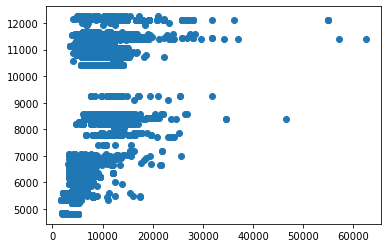

In [198]:
plt.scatter(x=y_test,y=predict_test)

In [199]:
predict_train=dtr.predict(x1_train)
print(r2_score(y1_train,predict_train)*100)

75.72999993686021


The Cross validation score for Decision Tree Regressor model

In [200]:
Train_accuracy=r2_score(y1_train,predict_train)
Test_accuracy=r2_score(y1_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6745140130465932 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is -0.2631949245963776


At cross fold(j) the cv score is 0.6895940700129645 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is -0.2631949245963776


At cross fold(j) the cv score is 0.697190918339277 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is -0.2631949245963776


At cross fold(j) the cv score is 0.6970027979967108 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is -0.2631949245963776


At cross fold(j) the cv score is 0.6988364661050004 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is -0.2631949245963776


At cross fold(j) the cv score is 0.6981900808290288 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is -0.2631949245963776


At cross fold(j) the cv score

The Cross validation score of flight ticket price for training & tesing accuracy score is 75% & 70% respectively.

Lets plot with y_test vs prediction

In [201]:
plt.scatter(x=y1_test,y=predict_test)

# Random Forest Regressor Model

In [202]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [203]:
for i in range(0,10):
    x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.7,random_state=i)
    rdr.fit(x2_train,y2_train)
    pred_train=rdr.predict(x2_train)
    pred_test=rdr.predict(x2_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y2_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y2_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.7374534113042632
At random state 0,the testing accuracy is:0.6913348630213842


At random state 1,the training accuracy is:0.6979030271324778
At random state 1,the testing accuracy is:0.6630341570343705


At random state 2,the training accuracy is:0.7488443654510903
At random state 2,the testing accuracy is:0.7001701383431849


At random state 3,the training accuracy is:0.7085705308489119
At random state 3,the testing accuracy is:0.6922723342569792


At random state 4,the training accuracy is:0.7160258754314444
At random state 4,the testing accuracy is:0.7191320316245893


At random state 5,the training accuracy is:0.7309125849266245
At random state 5,the testing accuracy is:0.6903562324947705


At random state 6,the training accuracy is:0.7639637898722988
At random state 6,the testing accuracy is:0.6915367319618928


At random state 7,the training accuracy is:0.7347994716110205
At random state 7,the testing accuracy is:0.7003767637425556




In [204]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.7,random_state=4)
rdr.fit(x2_train,y2_train)

RandomForestRegressor()

In [205]:
pred=rdr.predict(x_test)

In [206]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual     Predicted
6753     4508   4472.123890
9141     4668   5070.416888
6400    10588  11395.168289
7276     8529   9692.763467
10536   11200  10835.700537
5235     4804   4787.868564
3464     7153   9347.953167
2330     4823   4395.037540
6274    10262  10693.164081
3864     6934   6111.741972
2590     3943   4395.037540
6474    17327  14820.147250
6926     7893   8246.967414
7248     5406  10693.164081
5265     4878   5070.416888
10415    4544   5181.128663
1792    14151  13628.474341
6871     4544   5181.128663
10066    9165   6855.003253
3888     4804   4787.868564
7612    10783  12947.190445
496     14714  15191.173719
9068     9653  11338.608150
981      5162   5842.515152
4756     3807   4472.123890
2973    16736  18660.964474
8470    27992  18660.964474
830      7268   9347.953167
2569     4804   4787.868564
398     10741   8195.821465
7337    11087  10123.301018
4031     7229   7525.595848
810     13848  11395.168289
3007    13817  18660.964474
7638     8266  10835.700537
9756    13250  12947.190445
4909    11005   2374.474095
190      8738   6855.003253
6256     4823   4395.037540
1156     4591   4395.037540
5505     5000   5653.093737
549     11096   8246.967414
482      6643   7637.510212
5620     8479   7637.510212
10048    2759   3823.429989
4921     4668   5070.416888
7768     4423   4395.037540
4329     7229   5181.128663
8907    14571  13628.474341
5481    14781  13628.474341
9162     3687   7891.512873
3813     7888  10835.700537
10671    3100   3165.028998
3764     3749   4395.037540
9741    12373  10693.164081
5507    12347  15191.173719
841     10262  10693.164081
2985    11701  11338.608150
2355    14237  14013.595329
7511    10407  10835.700537
1060    12373  10693.164081
4536     3841   3901.361570
3377     5380   5785.935196
2069    10844   9692.763467
6296     3384   4428.811226
3136     6582   7210.918255
1321    12865  11338.608150
7025     3850   4428.811226
3739     4878   5070.416888
3768     8040   6616.341115
10255    7229   7525.595848
9800     3873   4241.515618
3667    16352   8973.147219
696      6838  10835.700537
3780    13882  14013.595329
9581    16389  11395.168289
472      6316   7210.918255
1053     5054   7210.918255
10338   18191  16778.282185
3871     3919   3904.621124
1589    11789  10835.700537
3480     4804   4787.868564
124      3540   4428.811226
4736     7064   9692.763467
8540     4778   4787.868564
2018    10262  10693.164081
2325     5769   5181.128663
6066     9042  10835.700537
1862    10975  11338.608150
5673    14629  10972.298418
5267     4176   5785.935196
2392     6093   7210.918255
381     15129  14013.595329
2915    13355  12947.190445
7952     3342   3560.963340
10595    6628   7210.918255
3113     5704   8973.147219
9910     7198  10835.700537
3915    16079  15191.173719
738      8907   8973.147219
4226    14714  15191.173719
4676    22950  21258.453809
5868     3205   3823.429989
7924     5320   5842.515152
465     14388  13628.474341
5871     5912   7210.918255
510     26890  18660.964474
7053     6732  10835.700537
5442     9443  11338.608150
9778    14086   9347.953167
7290     7198  10835.700537
1840    12681  13628.474341
7259    13014  14013.595329
1804    10283  11338.608150
8414     8040   6616.341115
3140     8476  10835.700537
109     15129  14013.595329
4893    14571  13628.474341
3248     3859   4137.740803
56      17345  12947.190445
975     26890  18660.964474
3670     3807   4472.123890
6003    13014  14013.595329
9627    10203   8246.967414
9301    10262  10693.164081
5602     6284   5785.935196
818     13542  10835.700537
8168     7591   8195.821465
5451    15058  10835.700537
9250     8907   8973.147219
8763     9564   9523.171429
8628     2754   3560.963340
9322     4804   4787.868564
8490     6961   6129.378226
4086    16289  15191.173719
8680    10676  12183.518239
5754     3543   3552.622639
7677     5894   7210.918255
6697    11401  10805.785483
1108    10262  10693.164081
6520     5198   5181.128663
4936    14848  10835.700537
676

In [207]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y2_test,pred))
print("Mean squared error:",mean_squared_error(y2_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y2_test,pred)))

error:
Mean absolute error: 4628.637438709569
Mean squared error: 35598175.98423548
Root mean squared error: 5966.420701244212


In Random Forest Regressor model, The root mean squared error value is high when comapred with Decision tree regressor.

In [208]:
predict_test=rdr.predict(x2_test)
print(r2_score(y2_test,predict_test)*100)

72.19942853747031


In [209]:
predict_train=rdr.predict(x2_train)
print(r2_score(y2_train,predict_train)*100)

71.19756976742767


The Cross validation score for Random Forest Regressor Model

In [210]:
Train_accuracy=r2_score(y2_train,predict_train)
Test_accuracy=r2_score(y2_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.7035531548444045 and accuracy score for training is 0.7119756976742766 and accuracy score  for testing is 0.7219942853747031


At cross fold(j) the cv score is 0.7017261217226446 and accuracy score for training is 0.7119756976742766 and accuracy score  for testing is 0.7219942853747031


At cross fold(j) the cv score is 0.7105554567463387 and accuracy score for training is 0.7119756976742766 and accuracy score  for testing is 0.7219942853747031


At cross fold(j) the cv score is 0.7074663446442851 and accuracy score for training is 0.7119756976742766 and accuracy score  for testing is 0.7219942853747031


At cross fold(j) the cv score is 0.7124793486111182 and accuracy score for training is 0.7119756976742766 and accuracy score  for testing is 0.7219942853747031


At cross fold(j) the cv score is 0.7081087195164925 and accuracy score for training is 0.7119756976742766 and accuracy score  for testing is 0.7219942853747031


At cross fold(j) the cv scor

The Cross validation score of flight ticket price for training & testing accuracy score is 71% & 69% respectively.

Lets plot with y_test vs prediction

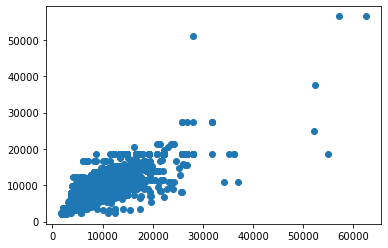

In [211]:
plt.scatter(x=y2_test,y=predict_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

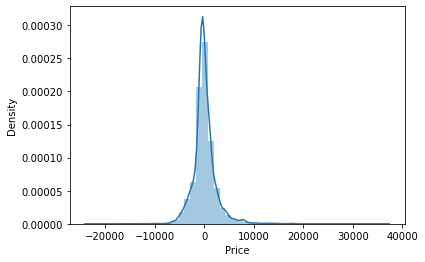

In [212]:
sns.distplot((y2_test-predict_test),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Decision Tree Regressor Model

In [237]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [238]:
for i in range(0,10):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.7,random_state=i)
    dtr.fit(x1_train,y1_train)
    pred_train=dtr.predict(x1_train)
    pred_test=dtr.predict(x1_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y1_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y1_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.7431485286318541
At random state 0,the testing accuracy is:0.6882118102583764


At random state 1,the training accuracy is:0.6990100846262113
At random state 1,the testing accuracy is:0.6499085008705183


At random state 2,the training accuracy is:0.757299999368602
At random state 2,the testing accuracy is:0.7093162394066463


At random state 3,the training accuracy is:0.7112340466610103
At random state 3,the testing accuracy is:0.6861760364310351


At random state 4,the training accuracy is:0.7226291870333854
At random state 4,the testing accuracy is:0.7012592035383157


At random state 5,the training accuracy is:0.7336139906041153
At random state 5,the testing accuracy is:0.6831902223515349


At random state 6,the training accuracy is:0.7699045568672216
At random state 6,the testing accuracy is:0.6776960376996034


At random state 7,the training accuracy is:0.7433400322002832
At random state 7,the testing accuracy is:0.6962016212360846


A

In [239]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.7,random_state=2)
dtr.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [240]:
pred=dtr.predict(x_test)

In [241]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df

Actual     Predicted
6753     4508   4454.615385
9141     4668   5134.395349
6400    10588  11396.809524
7276     8529   9806.150754
10536   11200  10855.487342
5235     4804   4813.333333
3464     7153   9203.103448
2330     4823   4364.666667
6274    10262  10812.275000
3864     6934   5851.777778
2590     3943   4364.666667
6474    17327  16359.750000
6926     7893   8079.520000
7248     5406  10812.275000
5265     4878   5134.395349
10415    4544   5297.283019
1792    14151  13639.768817
6871     4544   5297.283019
10066    9165   7498.647059
3888     4804   4813.333333
7612    10783  12209.000000
496     14714  15247.836538
9068     9653  11626.252427
981      5162   5982.187500
4756     3807   4454.615385
2973    16736  18162.393939
8470    27992  18162.393939
830      7268   9203.103448
2569     4804   4813.333333
398     10741   8016.777778
7337    11087   9247.395349
4031     7229   7445.717391
810     13848  11396.809524
3007    13817  18162.393939
7638     8266  10855.487342
9756    13250  12209.000000
4909    11005   3693.666667
190      8738   7498.647059
6256     4823   4364.666667
1156     4591   4364.666667
5505     5000   6123.466667
549     11096   8079.520000
482      6643   7258.117647
5620     8479   7258.117647
10048    2759   3868.033333
4921     4668   5134.395349
7768     4423   4364.666667
4329     7229   5297.283019
8907    14571  13639.768817
5481    14781  13639.768817
9162     3687   6878.933333
3813     7888  10855.487342
10671    3100   3502.476190
3764     3749   4364.666667
9741    12373  10812.275000
5507    12347  15247.836538
841     10262  10812.275000
2985    11701  11626.252427
2355    14237  14325.507692
7511    10407  10855.487342
1060    12373  10812.275000
4536     3841   3957.705882
3377     5380   5196.621622
2069    10844   9806.150754
6296     3384   4556.604167
3136     6582   7332.308458
1321    12865  11626.252427
7025     3850   4556.604167
3739     4878   5134.395349
3768     8040   6759.967742
10255    7229   7445.717391
9800     3873   4078.327586
3667    16352   9023.710843
696      6838  10855.487342
3780    13882  14325.507692
9581    16389  11396.809524
472      6316   7332.308458
1053     5054   7332.308458
10338   18191  11107.333333
3871     3919   3928.096774
1589    11789  10855.487342
3480     4804   4813.333333
124      3540   4556.604167
4736     7064   9806.150754
8540     4778   4813.333333
2018    10262  10812.275000
2325     5769   5297.283019
6066     9042  10855.487342
1862    10975  11626.252427
5673    14629  12395.000000
5267     4176   5196.621622
2392     6093   7332.308458
381     15129  14325.507692
2915    13355  12209.000000
7952     3342   3837.935484
10595    6628   7332.308458
3113     5704   9023.710843
9910     7198  10855.487342
3915    16079  15247.836538
738      8907   9023.710843
4226    14714  15247.836538
4676    22950  23843.000000
5868     3205   3868.033333
7924     5320   5982.187500
465     14388  13639.768817
5871     5912   7332.308458
510     26890  18162.393939
7053     6732  10855.487342
5442     9443  11626.252427
9778    14086   9203.103448
7290     7198  10855.487342
1840    12681  13639.768817
7259    13014  14325.507692
1804    10283  11626.252427
8414     8040   6759.967742
3140     8476  10855.487342
109     15129  14325.507692
4893    14571  13639.768817
3248     3859   4991.500000
56      17345  12209.000000
975     26890  18162.393939
3670     3807   4454.615385
6003    13014  14325.507692
9627    10203   8079.520000
9301    10262  10812.275000
5602     6284   5196.621622
818     13542  10855.487342
8168     7591   8016.777778
5451    15058  10855.487342
9250     8907   9023.710843
8763     9564   9564.000000
8628     2754   3837.935484
9322     4804   4813.333333
8490     6961   5989.600000
4086    16289  15247.836538
8680    10676  12454.672897
5754     3543   3591.333333
7677     5894   7332.308458
6697    11401  11681.000000
1108    10262  10812.275000
6520     5198   5297.283019
4936    14848  10855.487342
676

In [242]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y1_test,pred))
print("Mean squared error:",mean_squared_error(y1_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y1_test,pred)))

error:
Mean absolute error: 4627.133836753464
Mean squared error: 36908610.6165126
Root mean squared error: 6075.2457247845205


In Decision Tree Regressor model, The Root mean squared error value is slightly better when compare with linear regressor model.but still we should compare with more model.

In [243]:
predict_test=dtr.predict(x1_test)
print(r2_score(y1_test,predict_test)*100)

70.94160817591651


In [244]:
predict_train=dtr.predict(x1_train)
print(r2_score(y1_train,predict_train)*100)

75.72999993686021


The Cross validation score for Decision Tree Regressor model

In [221]:
Train_accuracy=r2_score(y1_train,predict_train)
Test_accuracy=r2_score(y1_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for testing is {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.6743886493293193 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6896104629274366 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6971917351186885 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6971369582414578 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6986577464616476 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0.6981900808290288 and accuracy score for training is 0.757299999368602 and accuracy score  for testing is 0.7093536041570329


At cross fold(j) the cv score is 0

The Cross validation score of flight ticket price for training & tesing accuracy score is 75% & 70% respectively.

Lets plot with y_test vs prediction

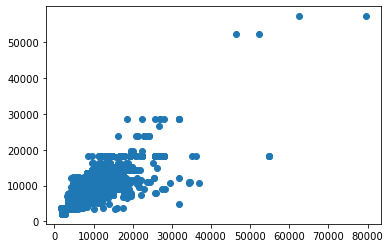

In [222]:
plt.scatter(x=y1_test,y=predict_test)

# Hyper Parameter Tuning

Hyper Parameter Tuning for Linear Regression

In [223]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [224]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
ls=r2_score(y_test,pred_decision)
print('R2 Score:',ls*100)

R2 Score: 24.715863489122412


Hyper Parameter Tuning for Decision Tree Regressor

In [225]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [226]:
GCV.best_params_

{'max_depth': 12, 'random_state': 9}

In [227]:
dtr=DecisionTreeRegressor(max_depth=12,random_state=9)

dtr.fit(x1_train,y1_train)
dtr.score(x1_train,y1_train)
pred_decision=dtr.predict(x1_test)
dtr=r2_score(y1_test,pred_decision)
print('R2 Score:',dtr*100)

R2 Score: 70.94160817591651


Hyper Parameter Tuning for Random Forest Regressor

In [228]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x2_train,y2_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt', 'random_state': 3}


In [229]:
rdr=RandomForestRegressor(criterion='mse',max_features='sqrt',random_state=3)
rdr.fit(x2_train,y2_train)
rdr.score(x2_train,y2_train)
pred_decision=rdr.predict(x2_test)
rdr=r2_score(y2_test,pred_decision)
print('R2 Score:',rdr*100)

R2 Score: 72.05164274638025


Compare with Actual Final Vs Sample Prediction

Y2 Test    Prediction
4543     8266   6123.466667
3326     7662   7258.117647
9497    13587   3502.476190
2642    10262   4991.500000
528      3398  11626.252427

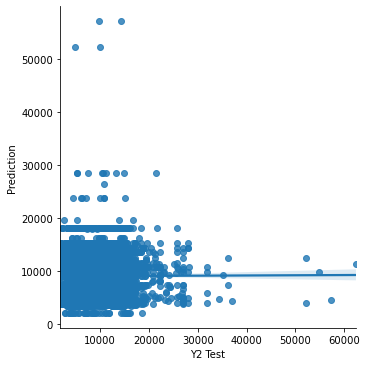

In [230]:
data=pd.DataFrame({'Y2 Test':y2_test , 'Prediction':predict_test},columns=['Y2 Test','Prediction'])
sns.lmplot(x='Y2 Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Model Saving

In [231]:
from operator import mod

In [232]:
import joblib
joblib.dump(mod,"Flight Price Prediction.pkl")

['Flight Price Prediction.pkl']

# Loading the Saved Model

In [233]:
model=joblib.load("Flight Price Prediction.pkl")

In [246]:
prediction=dtr.predict(x1_test)
print(r2_score(y1_test,predict_test)*100)

70.94160817591651


In [247]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Result of Flight Price Prediction.csv')  
prediction.head()

0
0   6123.466667
1   7258.117647
2   3502.476190
3   4991.500000
4  11626.252427